In [1]:
import numpy as np
import pytest
import ase.units as units



from ase import Atoms, io
from ase.constraints import FixInternals

from ase.optimize.minimahopping import MinimaHopping

from ase.calculators.lj import LennardJones
#from ase.optimize.basin_mul import BasinHoppingm
from ase.io import read
from ase.units import kB
from ase.calculators.tip4p import TIP4P, epsilon0, sigma0, rOH, angleHOH
from math import cos, sin, pi
from ase.calculators.qmmm import (SimpleQMMM, EIQMMM, LJInteractions,
                                  LJInteractionsGeneral)

from matplotlib import pyplot as plt

In [2]:
from tools.tip4p_cluster import tip4pcluster, tip4pcluster2
from tools.tip4p_cluster import add_tip4p_const

In [7]:
w5=tip4pcluster2(10, 5).water()

In [8]:

from ase.visualize import view
view(w5, viewer='x3d')



In [7]:
original_positions = 1. * w5.get_positions()
original_positions

array([[ 0.64808304, -1.26778164, -0.12042051],
       [ 0.64808304, -0.68189937,  0.63652982],
       [ 0.64808304, -0.68189937, -0.87737084],
       [-1.63618396,  1.35568079,  2.67563072],
       [-1.63618396,  1.94156307,  3.43258105],
       [-1.63618396,  1.94156307,  1.91868039],
       [ 0.91031328, -2.44490811,  0.20650845],
       [ 0.91031328, -1.85902584,  0.96345878],
       [ 0.91031328, -1.85902584, -0.55044187],
       [-1.94240081,  1.70395827, -0.70590503],
       [-1.94240081,  2.28984055,  0.05104529],
       [-1.94240081,  2.28984055, -1.46285536],
       [ 0.85393728,  0.89240148, -1.61680941],
       [ 0.85393728,  1.47828376, -0.85985908],
       [ 0.85393728,  1.47828376, -2.37375973]])

In [10]:
??MinimaHopping

In [24]:
!mkdir w5

mkdir: w5: File exists


In [10]:
hop = MinimaHopping(w5,
                    Ediff0=0.5,
                    #T0=400., 
                   mdmin = 2, 
                    minima_traj = 'w5/initw5_rd.traj', 
                    logfile='w5/hop_rd1.log'
                   )
hop(totalsteps=20)

In [34]:
hop(totalsteps=80)

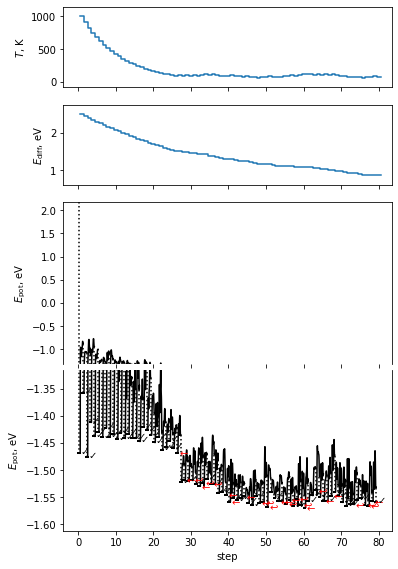

In [35]:
from ase.optimize.minimahopping import MHPlot

mhplot = MHPlot(logname='w5/hop_rd1.log')
mhplot.save_figure('md_w5_20step.png')

In [30]:
??MHPlot

In [43]:
import os
empty = os.path.getsize('w5/initw5_rd.traj')== 0
if not empty:
    traj = io.Trajectory('w5/initw5_rd.traj', 'r')
    w5minima = [add_tip4p_const(atoms) for atoms in traj]
else:
    w5minima = []
            

In [44]:
len(w5minima)

54

In [45]:


#io.write('h2o5.xyz', atoms)
from ase.visualize import view
view(w5minima[53], viewer='x3d')


In [49]:
w5minima[53].get_potential_energy()*96.485

-150.44091667324642

In [46]:
other = read(ftraj)
E2 = other.get_potential_energy()

NameError: name 'ftraj' is not defined

In [24]:
local= read('local_minima.traj')

In [26]:
read('lowest_basinm_w5.traj').get_potential_energy()

-2.493279715598333

In [27]:
from ase.io.trajectory import Trajectory
traj = Trajectory('lowest_basinm_w5.traj')
atoms = traj[-1]

#io.write('h2o5.xyz', atoms)
from ase.visualize import view
view(atoms, viewer='x3d')

In [31]:
from ase.db import connect

lm = connect('local_minima.db')

In [33]:
for row in lm.select(relaxed = False):
    

In [45]:
i=0
for row in lm.select(id=0): 
    print(i)  
    i+=1

In [57]:
lm.get(id=15)

In [62]:
view(lm.get_atoms(selection = 'id=1'), viewer='x3d')

In [63]:
lm.get_atoms(selection = 'id=1')

AttributeError: 'Atoms' object has no attribute 'energy'